In [22]:
import json
from lxml import etree
import re
import base64, io
from IPython import display
from PIL import Image, ImageDraw


All information under `processed` are extracted from the trace file `trace.zip` with help from the [playwright trace viewer](https://playwright.dev/python/docs/trace-viewer). See `src/data_utils/process_trace.py` for more detail.

`dom_content` is extracted via [Chrome DevTools](https://chromedevtools.github.io/devtools-protocol/tot/DOMSnapshot/#method-captureSnapshot), the `raw_html` and `cleaned_html` are converted from the captured dom content.

In [23]:
# from dom_utils import build_dom_tree
# sample = dom_content[0]["before"]["dom"]
# parsed_dom_tree = build_dom_tree(sample["documents"][0], sample["documents"], sample["strings"])
# print(parsed_dom_tree)
# print(etree.tostring(parsed_dom_tree, pretty_print=True).decode("utf-8"))

The screenshots are encoded as base64 strings. Ground truth action of each step is stored as `action.boudning_box`.

In [24]:
step_num = 3
data_dir = f"/local/scratch/lin.3976/SeeAct/process_playwright/test/eBay_1/step_{step_num}" # "/local/scratch/lin.3976/SeeAct/process_playwright/test/Amazon_1/step_1"
# with open(data_dir + "/task_meta.json", "r") as f:
#     task_meta = json.load(f)
# print(data_dir)
with open(data_dir + "/content.json", "r") as f:
    dom_content = json.load(f)
# print(dom_content)
# print("sep")
with open(data_dir + "/screenshot.json", "r") as f:
    screenshots = json.load(f)
# print(screenshots)
before_image_dir = f"/local/scratch/lin.3976/SeeAct/online_results/eBay_1/unmarked_screenshots/unmarked_screen_{step_num}.png"
after_image_dir = f"/local/scratch/lin.3976/SeeAct/online_results/eBay_1/unmarked_screenshots/unmarked_screen_{step_num + 1}.png"

[{'action_uid': 'button', 'before': {'screenshot': '/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCEpnBQADASIAAhEBAxEB/8QAHgABAAIDAQEBAQEAAAAAAAAAAAQHBQYIAwIJAQr/xAB5EAABBAEDAgIFBgkFBg4LAh8BAAIDBAUG

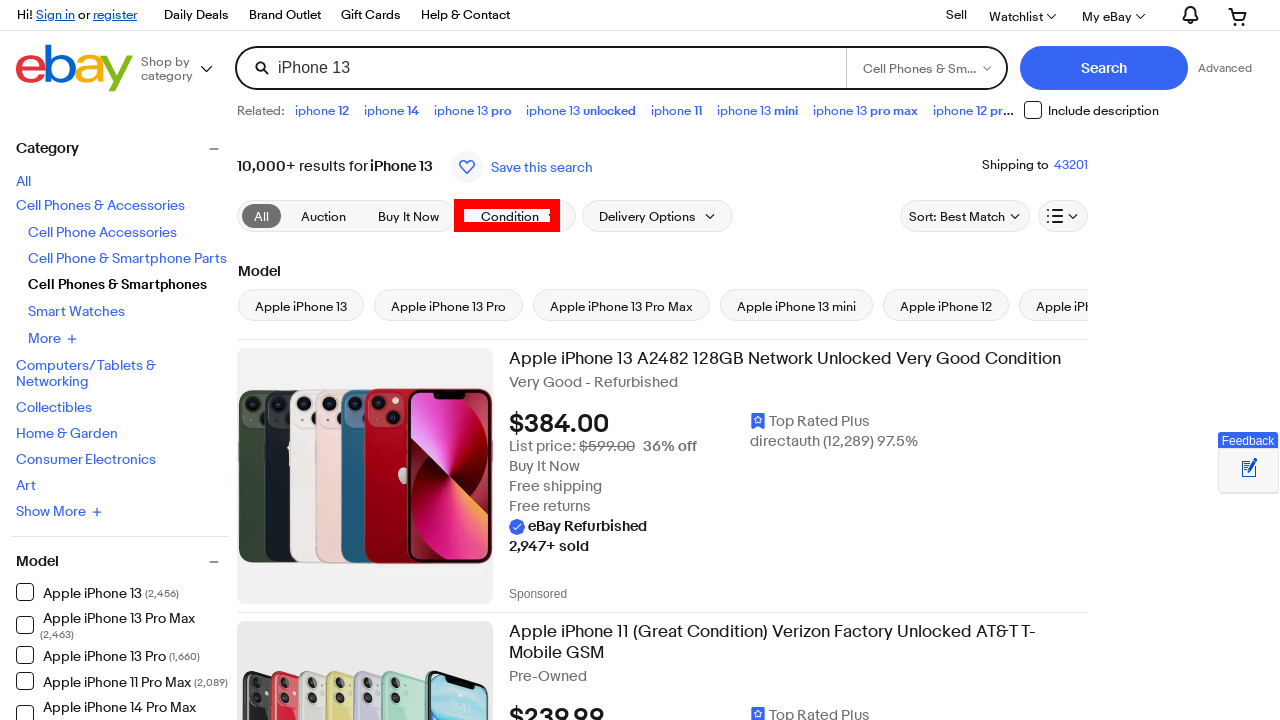

In [25]:

# before_screenshot = Image.open(io.BytesIO(base64.b64decode(screenshots[0]["before"]["screenshot"])))
before_screenshot = Image.open(before_image_dir)
# draw = ImageDraw.Draw(before_screenshot)
# before_screenshot
print(screenshots)
# print(screenshots[0]['action']['bounding_box'].keys())
x0 = screenshots[0]['action']['bounding_box']['x']
y0 = screenshots[0]['action']['bounding_box']['y']
h = screenshots[0]['action']['bounding_box']['height']
w = screenshots[0]['action']['bounding_box']['width']
# Creating a Draw object 
draw = ImageDraw.Draw(before_screenshot) 
shape = [(x0, y0), (x0 + w, y0 + h)]
draw.rectangle(shape, width=10, outline ="red") 
  
# Method to display the modified image 
before_screenshot
# after_screenshot
# display.Image(before_screenshot)

dict_keys(['x', 'y', 'width', 'height'])


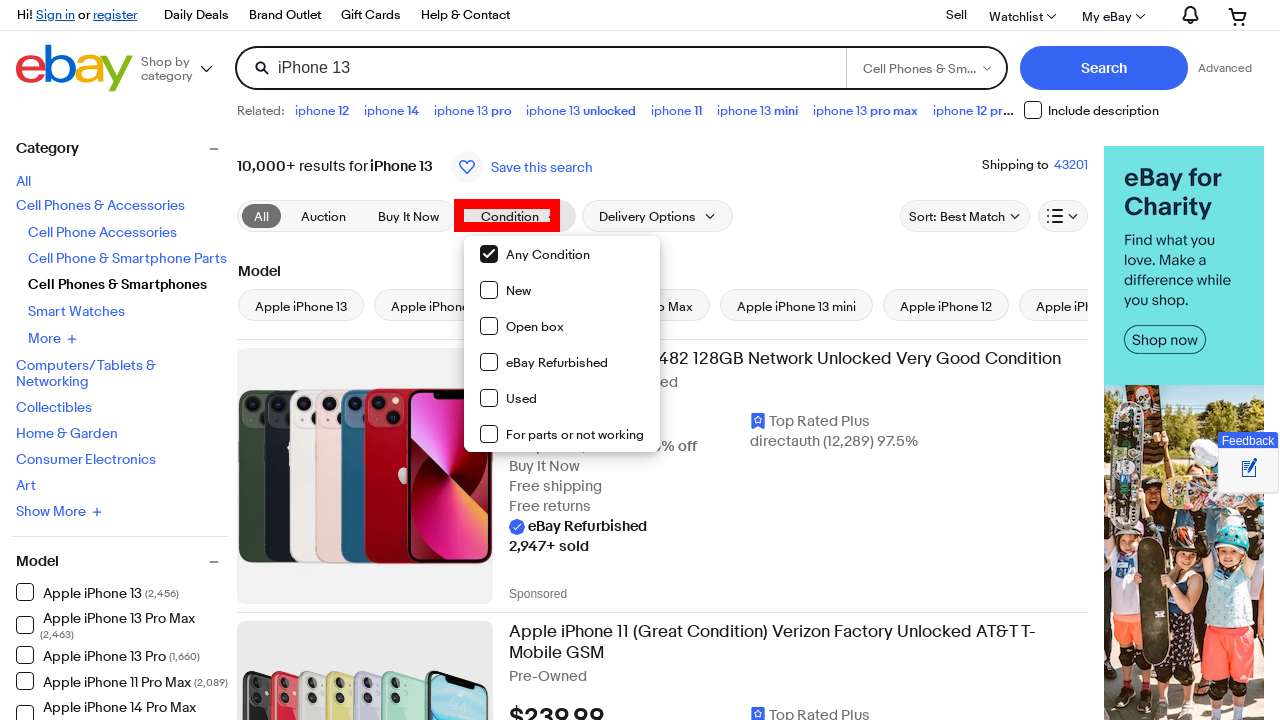

In [26]:

print(screenshots[0]['action']['bounding_box'].keys())
x0 = screenshots[0]['action']['bounding_box']['x']
y0 = screenshots[0]['action']['bounding_box']['y']
h = screenshots[0]['action']['bounding_box']['height']
w = screenshots[0]['action']['bounding_box']['width']
after_screenshot = Image.open(after_image_dir) #Image.open(io.BytesIO(base64.b64decode(screenshots[0]["after"]["screenshot"])))
# Creating a Draw object 
draw = ImageDraw.Draw(after_screenshot) 
shape = [(x0, y0), (x0 + w, y0 + h)]
draw.rectangle(shape, width=10, outline ="red") 
  
# Method to display the modified image 
after_screenshot 
# after_screenshot